# 参考サイト 
- https://github.com/cnloni/tensorflow-bezier/blob/master/main3.py
- [TensorFlow APIドキュメントを眺める -Math編-](https://dev.classmethod.jp/machine-learning/tensorflow-math/)

In [1]:
from sympy import *
from sympy.abc import a,b,c
init_session()
import numpy as np
%matplotlib inline
from sympy import var
from rdlib2 import *

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



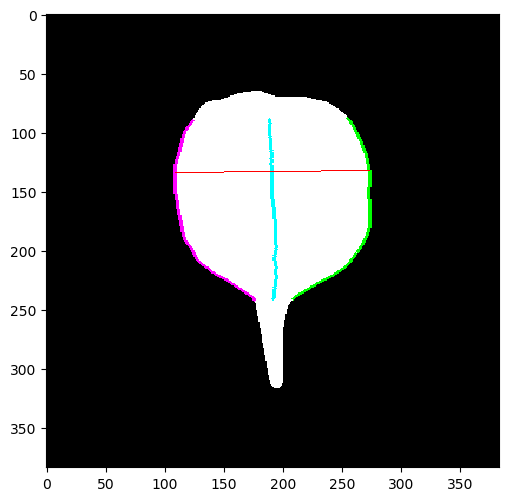

In [2]:
%matplotlib inline
UNIT = 256

path='シルエット/17Apically/17daruma6o06_l.jpg'

path='シルエット/17Horn/17aomida1o02_l.jpg'
path ='シルエット/17Spheric/17yakumi2o06_l.jpg'
# 画像の読み込み
src = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# 画像サイズを標準化する。
img = getstandardShape(src, unitSize=UNIT,showResult=False)
ll,rl,cl,dmax  = threeLinesSeq(img, showImage =  True, n_samples=16);

diffpara 0.051822531968355234
diffpara 0.039999961853027344
diffpara 0.010000050067901611
diffpara 0.0
diffpara 0.04643617197871214
diffpara 0.0
diffpara 0.060987517237663325
diffpara 0.019999995827674866
diffpara 0.020000040531158447
diffpara 0.019999980926513672
diffpara 0.019999980926513672
diffpara 0.010000020265579224
diffpara 0.0


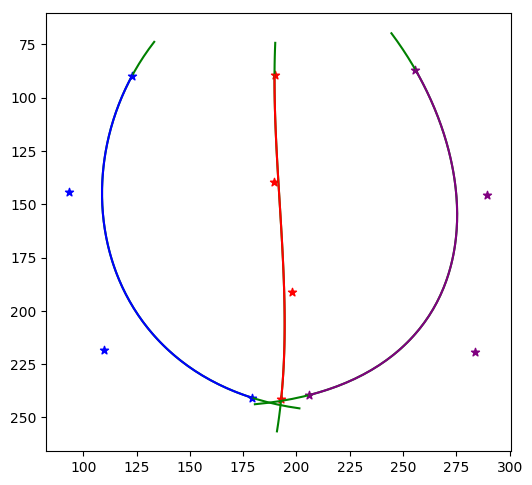

In [3]:
%matplotlib inline
ldata,cdata,rdata = fitBezierAndDraw([ll,cl,rl],mode=4,showImage=True)

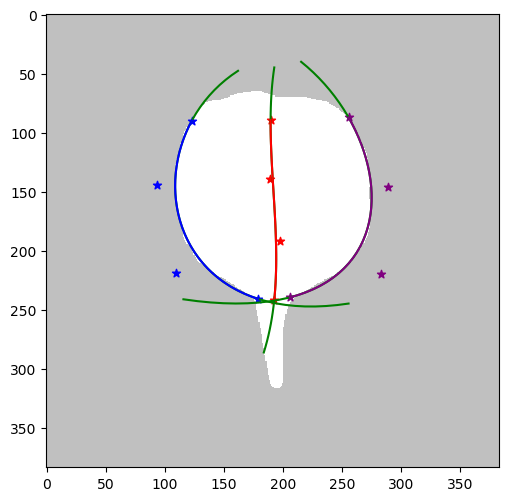

In [4]:
drawThreeLines(ldata,cdata,rdata,img=img,withImage=True)

# 座標変換

画像データは下がY方向の正方向であるが、思考の妨げとなるので以下では数学の習慣に合わせて上が正となるように変換して扱おうと思う。

また、ついでに高さが概ね1となるよう正規化する。高さは今得られている中心軸概形の高さを基準にする。

In [5]:
def normalizeR(ldata,cdata,rdata,ll,cl,rl,showImage=True):
    [cpxl,cpyl,bezXl,bezYl,tpl]=ldata # cpxx , cpyx 制御点４つの座標配列、
    [cpxc,cpyc,bezXc,bezYc,tpc]=cdata  # bezXx,bezYx ベジエ 曲線、
    [cpxr,cpyr,bezXr,bezYr,tpr]=rdata  # tpl 制御点のパラメータ
    ll2 = ll.copy()
    cl2 = cl.copy()
    rl2 = rl.copy()
    # ll, cl, rl 左輪郭点列、軸点列、右輪郭点列（座標のリスト）

    # 基準となる点を軸の制御点 P4 とする。画像中下に位置するのでこれを逆に P0 に変えたい。
    xbase = cpxc[-1] # 一番下の点を基準点とする
    ybase = cpyc[-1] # 
    # 軸の制御点の縦幅を正規化の基準長さとする。
    unit = np.max(cpyc)-np.min(cpyc) 
    # 各データの座標変換
    cpxl,cpxc,cpxr = cpxl-xbase,cpxc-xbase,cpxr-xbase
    cpyl,cpyc,cpyr = ybase-cpyl,ybase-cpyc,ybase-cpyr
    cpxl,cpxc,cpxr = cpxl/unit,cpxc/unit,cpxr/unit
    cpyl,cpyc,cpyr = cpyl/unit,cpyc/unit,cpyr/unit
    # P0,P1,P2,P3 の並びを逆順に（下から上）
    cpxl,cpxc,cpxr = cpxl[::-1],cpxc[::-1],cpxr[::-1]
    cpyl,cpyc,cpyr = cpyl[::-1],cpyc[::-1],cpyr[::-1]
    # サンプル点の位置を正規化すると共に逆順に（下から上）
    ll2[:,1],rl2[:,1],cl2[:,1] = ybase-ll2[::-1,1],ybase-rl2[::-1,1],ybase-cl2[::-1,1]
    ll2[:,0],rl2[:,0],cl2[:,0] = ll2[::-1,0]-xbase,rl2[::-1,0]-xbase,cl2[::-1,0]-xbase
    ll2,rl2,cl2 = ll2/unit,rl2/unit,cl2/unit
    
    t0l,t0r,t0c =1-tpl[::-1],1-tpr[::-1],1-tpc[::-1] # パラメータ推定の初期値
    
    t,p0,p1,p2,p3 = symbols("t,p0,p1,p2,p3")
    # ３次のベジエ曲線の定義式制御点 P0~P3 とパラメータ　　t　の関数として定義
    bez3 = (1-t)**3*p0 + 3*(1-t)**2*t*p1 + 3*(1-t)*t**2*p2 + t**3*p3
    
    # 結果の描画
    if showImage:
        bezXl = bez3.subs([(p0,cpxl[0]),(p1,cpxl[1]),(p2,cpxl[2]),(p3,cpxl[3])])
        bezYl = bez3.subs([(p0,cpyl[0]),(p1,cpyl[1]),(p2,cpyl[2]),(p3,cpyl[3])])
        bezXc = bez3.subs([(p0,cpxc[0]),(p1,cpxc[1]),(p2,cpxc[2]),(p3,cpxc[3])])
        bezYc = bez3.subs([(p0,cpyc[0]),(p1,cpyc[1]),(p2,cpyc[2]),(p3,cpyc[3])])
        bezXr = bez3.subs([(p0,cpxr[0]),(p1,cpxr[1]),(p2,cpxr[2]),(p3,cpxr[3])])
        bezYr = bez3.subs([(p0,cpyr[0]),(p1,cpyr[1]),(p2,cpyr[2]),(p3,cpyr[3])])
        
        ldata=[cpxl,cpyl,bezXl,bezYl,tpl] # cpxx , cpyx 制御点４つの座標配列、
        cdata=[cpxc,cpyc,bezXc,bezYc,tpc] # bezXx,bezYx ベジエ 曲線、
        rdata=[cpxr,cpyr,bezXr,bezYr,tpr] # tpl 制御点のパラメータ

        drawThreeLines(ldata,cdata,rdata,img=None,withImage=False,invertImage=False)
        plt.scatter(np.array(ll2)[:,0],np.array(ll2)[:,1])
        plt.scatter(np.array(cl2)[:,0],np.array(cl2)[:,1])
        plt.scatter(np.array(rl2)[:,0],np.array(rl2)[:,1])
          
    cpl=[[cpx,cpy] for cpx,cpy in zip(cpxl,cpyl)]
    cpr=[[cpx,cpy] for cpx,cpy in zip(cpxr,cpyr)]
    cpc=[[cpx,cpy] for cpx,cpy in zip(cpxc,cpyc)]
    LP,RP=ll2,rl2
    
    return LP,RP,cpl,cpr,cpc,t0l,t0r,t0c
    # LP,RP 左と右も輪郭のサンプル
    # cpl,cpr,cpc 左、軸、右の制御点
    # t0l,t0r,t0c パラメータの推定値

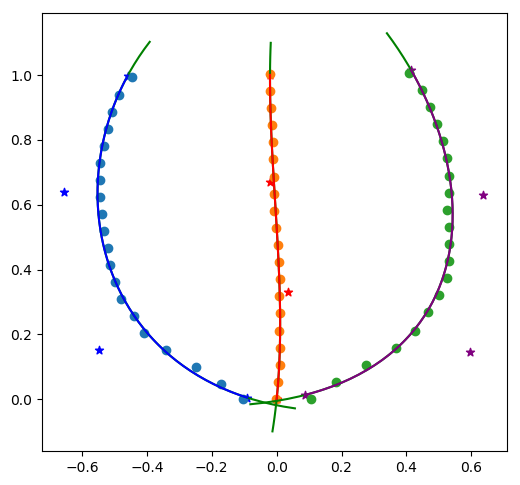

In [6]:
normalizeR(ldata,cdata,rdata,ll,cl,rl,showImage=True);

In [7]:
import tensorflow as tf

# 点Pを(cx,cy)周りに r ラジアン回転
def rotation(P,r,cx,cy): 
    A1=Matrix(([1,0,-cx], [0,1,-cy],[0,0,1]))  #  center が原点になるように平行移動
    A2=Matrix(([cos(r),-sin(r),0], [sin(r),cos(r),0],[0,0,1])) # 原点周りに r ラジアン回転
    A3=Matrix(([1,0,cx], [0,1,cy],[0,0,1])) # 平行移動させた分だけ戻す
    A4=A3*A2*A1
    return (A4*Matrix([P[0],P[1],1]))[:2]

# 点列Plist 内の点をすべて (cx,cy)周りに r ラジアン回転
def rotationAll(Plist,r,cx,cy):
    return [rotation(P,r,cx,cy) for P in Plist]

def initialize(ldata,cdata,rdata,ll,cl,rl):
    #[cpxl,cpyl,bezXl,bezYl,tpl]=ldata    # 制御点x、y、ベジエ 関数
    #[cpxc,cpyc,bezXc,bezYc,tpc]=cdata
    #[cpxr,cpyr,bezXr,bezYr,tpr]=rdata
    # ll,cl,rl # サンプル点の座標データ　　numpy array
    Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,tc0 = normalizeR(ldata,cdata,rdata,ll,cl,rl,showImage=False)
    x00,y00 = float(cpc0[0][0]),float(cpc0[0][1]) # 軸基準点の推定位置
    x10,y10 = float(cpc0[1][0]),float(cpc0[1][1]) # 軸のP1の推定位置
    x20,y20 = float(cpc0[2][0]),float(cpc0[2][1]) # 軸のP2の推定位置
    x30,y30 = float(cpc0[3][0]),float(cpc0[3][1]) # 軸上端点の推定位置
    a00 = (getDegreeOfALine(x00,y00,x30,y30)-90)/180.0*np.pi
    a10 = (getDegreeOfALine(x00,y00,x10,y10)-90-a00)/180.0*np.pi
    a20 = (getDegreeOfALine(x30,y30,x20,y20)+90-a00)/180.0*np.pi
    
    return Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,tc0,a00,a10,a20,x00,y00 # パラメータの初期値

# 最小二乗法で個別に求めたベジエ曲線の制御点とパラメータ推定値を初期値とする。
def fitcurve0(Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,tc0,a00,a10,a20,x00,y00,showImage=False): 
    # Lsamples,Rsamples 左右のサンプル点、
    # cpr0,cpl0,cpc0 左右と中央のベジエ 曲線の制御点
    # t0l,t0r 制御点に対応するパラメータ
    
    g = tf.Graph()
    
    with g.as_default():

        #  ここではパラメータは定数として扱ってフィッティングする。　
        tl = tf.constant(tl0, tf.float32)
        tr = tf.constant(tr0, tf.float32)

        # モデル
        # 中心軸の制御点  [[0, 0], [0, py1], [0, py2], [0, py3]]
        # 左輪郭の制御点 [[0, 0], [-px1, py1], [-px2, py2], [-px3, py3]]
        # 右輪郭の制御点 [[0,0],[px1,py1],[px2,py2],[px3,py3]]
        # これに平行移動(x0,y0), (x0,y0)周りの回転 a0, P0周りの変形 a1, P3 周りの変形 a2 が加わっ他結果
        # が観測形状であると考える。
        
        print(a00,a10,a20,x00,y00,cpc0[1][1],cpc0[2][1],cpc0[3][1],(cpr0[1][0]-cpl0[1][0])/2,(cpr0[2][0]-cpl0[2][0])/2,(cpr0[3][0]-cpl0[3][0])/2)
        py1 = tf.Variable(float(cpc0[1][1]), tf.float32, name='py1')
        py2 = tf.Variable(float(cpc0[2][1]), tf.float32, name='py2')
        py3 = tf.Variable(float(cpc0[3][1]), tf.float32, name='py3')
        px0 = tf.Variable(float((cpr0[0][0]-cpl0[0][0])/2), tf.float32, name='px0')
        px1 = tf.Variable(float((cpr0[1][0]-cpl0[1][0])/2), tf.float32, name='px1')
        px2 = tf.Variable(float((cpr0[2][0]-cpl0[2][0])/2), tf.float32, name='px2')
        px3 = tf.Variable(float((cpr0[3][0]-cpl0[3][0])/2), tf.float32, name='px3')
        a0 = tf.Variable(float(a00), tf.float32, name='a0')
        a1 = tf.Variable(float(a10), tf.float32, name='a1')
        a2 = tf.Variable(float(a20), tf.float32, name='a2')
        x0 = tf.Variable(float(x00), tf.float32, name='x0')
        y0 = tf.Variable(float(y00), tf.float32, name='y0')

        CPC = [[x0, y0], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-py1*tf.sin(a1) + x0)*tf.cos(a0) - (py1*tf.cos(a1) + y0)*tf.sin(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-py1*tf.sin(a1) + x0)*tf.sin(a0) + (py1*tf.cos(a1) + y0)*tf.cos(a0)], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.cos(a0) - (py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.sin(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.sin(a0) + (py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.cos(a0)], [x0 + y0*tf.sin(a0) - (py3 + y0)*tf.sin(a0), -y0*tf.cos(a0) + y0 + (py3 + y0)*tf.cos(a0)]]
        CPL = [[-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) - (-px0*tf.sin(a1) + y0)*tf.sin(a0) + (-px0*tf.cos(a1) + x0)*tf.cos(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-px0*tf.sin(a1) + y0)*tf.cos(a0) + (-px0*tf.cos(a1) + x0)*tf.sin(a0)], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) - (-px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.sin(a0) + (-px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.cos(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.cos(a0) + (-px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.sin(a0)], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.cos(a0) - (-px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.sin(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.sin(a0) + (-px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.cos(a0)], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (-px3*tf.cos(a2) + x0)*tf.cos(a0) - (-px3*tf.sin(a2) + py3 + y0)*tf.sin(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (-px3*tf.cos(a2) + x0)*tf.sin(a0) + (-px3*tf.sin(a2) + py3 + y0)*tf.cos(a0)]]
        CPR = [[-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) - (px0*tf.sin(a1) + y0)*tf.sin(a0) + (px0*tf.cos(a1) + x0)*tf.cos(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (px0*tf.sin(a1) + y0)*tf.cos(a0) + (px0*tf.cos(a1) + x0)*tf.sin(a0)], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) - (px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.sin(a0) + (px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.cos(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (px1*tf.sin(a1) + py1*tf.cos(a1) + y0)*tf.cos(a0) + (px1*tf.cos(a1) - py1*tf.sin(a1) + x0)*tf.sin(a0)], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.cos(a0) - (px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.sin(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (px2*tf.cos(a2) - py2*tf.sin(a2) + py3*tf.sin(a2) + x0)*tf.sin(a0) + (px2*tf.sin(a2) + py2*tf.cos(a2) - py3*tf.cos(a2) + py3 + y0)*tf.cos(a0)], [-x0*tf.cos(a0) + x0 + y0*tf.sin(a0) + (px3*tf.cos(a2) + x0)*tf.cos(a0) - (px3*tf.sin(a2) + py3 + y0)*tf.sin(a0), -x0*tf.sin(a0) - y0*tf.cos(a0) + y0 + (px3*tf.cos(a2) + x0)*tf.sin(a0) + (px3*tf.sin(a2) + py3 + y0)*tf.cos(a0)]]                

        #  ベジエ 曲線の定義式
        #  cps 制御点のリスト
        sl,sr = tf.ones(shape=tf.shape(tl)) - tl, tf.ones(shape=tf.shape(tr)) - tr
        Tl = tf.stack([sl * sl * sl, 3 * sl * sl * tl, 3 * sl * tl * tl, tl * tl * tl])
        Tr = tf.stack([sr * sr * sr, 3 * sr * sr * tr, 3 * sr * tr * tr, tr * tr * tr])
        
        bezL = tf.matmul(Tl,CPL, transpose_a=True) # パラメータから算出される左のベジエ 曲線上の点
        bezR = tf.matmul(Tr,CPR, transpose_a=True) # パラメータから算出される右のベジエ 曲線上の点     
            
        # ロス関数
        loss = tf.reduce_mean(tf.square(Lsamples - bezL) + tf.square(Rsamples - bezR))

        # 最適化手法の設定。最急降下法　0.1はいわゆる学習係数　適当
        optimizer = tf.train.GradientDescentOptimizer(0.1)
        train = optimizer.minimize(loss)
        #        init = tf.initialize_all_variables()
        init = tf.global_variables_initializer()
        g.finalize()
    
    with tf.Session(graph=g) as sess:
        
        sess.run(init)
        # モデル当てはめのステップを繰り替えし実行
        for step in range(1001):
            sess.run(train)
            if step % 100 == 0: # 100 回毎に推定された係数値を表示
                print(step, sess.run([loss]))
        
        result = sess.run([CPL,CPR,CPC,a0,a1,a2,x0,y0,px0,px1,px2,px3,py1,py2,py3])
        
        print("result",result)
    
    t,p0,p1,p2,p3 = symbols("t,p0,p1,p2,p3")
    # ３次のベジエ曲線の定義式制御点 P0~P3 とパラメータ　　t　の関数として定義
    bez3 = (1-t)**3*p0 + 3*(1-t)**2*t*p1 + 3*(1-t)*t**2*p2 + t**3*p3
    
    if True:
        # 結果の描画
        CPL,CPR,CPC =np.array(result[0]),np.array(result[1]),np.array(result[2])
        cpxl = CPL[:,0]
        cpyl = CPL[:,1]
        cpxr = CPR[:,0]
        cpyr = CPR[:,1]
        cpxc = CPC[:,0]
        cpyc = CPC[:,1]
        ll,rl=Lsamples,Rsamples
    
        bezXl = bez3.subs([(p0,cpxl[0]),(p1,cpxl[1]),(p2,cpxl[2]),(p3,cpxl[3])])
        bezYl = bez3.subs([(p0,cpyl[0]),(p1,cpyl[1]),(p2,cpyl[2]),(p3,cpyl[3])])
        bezXc = bez3.subs([(p0,cpxc[0]),(p1,cpxc[1]),(p2,cpxc[2]),(p3,cpxc[3])])
        bezYc = bez3.subs([(p0,cpyc[0]),(p1,cpyc[1]),(p2,cpyc[2]),(p3,cpyc[3])])
        bezXr = bez3.subs([(p0,cpxr[0]),(p1,cpxr[1]),(p2,cpxr[2]),(p3,cpxr[3])])
        bezYr = bez3.subs([(p0,cpyr[0]),(p1,cpyr[1]),(p2,cpyr[2]),(p3,cpyr[3])])
        
        ldata = [cpxl,cpyl,bezXl,bezYl,tl0]
        cdata = [cpxc,cpyc,bezXc,bezYc,tc0]
        rdata = [cpxr,cpyr,bezXr,bezYr,tr0]
        
        drawThreeLines(ldata,cdata,rdata,img=None,withImage=False,invertImage=False)
        plt.scatter(np.array(Lsamples)[:,0],np.array(Lsamples)[:,1])
        plt.scatter(np.array(Rsamples)[:,0],np.array(Rsamples)[:,1])
              
    return result 

def seisho(Lsamples,Rsamples,a0,a1,a2,x0,y0,px0,px1,px2,px3,py1,py2,py3):
    CPC = np.array([[0, 0], [0, py1], [0, py2], [0, py3]])
    CPL = np.array([[-px0, 0], [-px1, py1], [-px2, py2], [-px3, py3]] )
    CPR = np.array([[px0, 0], [px1, py1], [px2, py2], [px3, py3]])
    
    Lsamples = rotationAll(Lsamples,-a0,x0,y0)
    Rsamples = rotationAll(Rsamples,-a0,x0,y0)
    
    t,p0,p1,p2,p3 = symbols("t,p0,p1,p2,p3")
    # ３次のベジエ曲線の定義式制御点 P0~P3 とパラメータ　　t　の関数として定義
    bez3 = (1-t)**3*p0 + 3*(1-t)**2*t*p1 + 3*(1-t)*t**2*p2 + t**3*p3
    
    if True:
        # 結果の描画
        cpxl = CPL[:,0]
        cpyl = CPL[:,1]
        cpxr = CPR[:,0]
        cpyr = CPR[:,1]
        cpxc = CPC[:,0]
        cpyc = CPC[:,1]
        ll,rl=Lsamples,Rsamples
    
        bezXl = bez3.subs([(p0,cpxl[0]),(p1,cpxl[1]),(p2,cpxl[2]),(p3,cpxl[3])])
        bezYl = bez3.subs([(p0,cpyl[0]),(p1,cpyl[1]),(p2,cpyl[2]),(p3,cpyl[3])])
        bezXc = bez3.subs([(p0,cpxc[0]),(p1,cpxc[1]),(p2,cpxc[2]),(p3,cpxc[3])])
        bezYc = bez3.subs([(p0,cpyc[0]),(p1,cpyc[1]),(p2,cpyc[2]),(p3,cpyc[3])])
        bezXr = bez3.subs([(p0,cpxr[0]),(p1,cpxr[1]),(p2,cpxr[2]),(p3,cpxr[3])])
        bezYr = bez3.subs([(p0,cpyr[0]),(p1,cpyr[1]),(p2,cpyr[2]),(p3,cpyr[3])])
        plt.figure(figsize=(7,10),dpi=100)
        # plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.scatter(np.array(ll)[:,0],np.array(ll)[:,1])
        # plt.scatter(np.array(cl)[:,0],np.array(cl)[:,1])
        plt.scatter(np.array(rl)[:,0],np.array(rl)[:,1])
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXl.subs(t,tp) for tp in tplins ]
        ploty = [bezYl.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxl,cpyl,marker='.')
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXl.subs(t,tp) for tp in tplins ]
        ploty = [bezYl.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXc.subs(t,tp) for tp in tplins ]
        ploty = [bezYc.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxc,cpyc)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXc.subs(t,tp) for tp in tplins ]
        ploty = [bezYc.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  
        tplins = np.linspace(-0.02, 1.02,50)
        plotx = [bezXr.subs(t,tp) for tp in tplins ]
        ploty = [bezYr.subs(t,tp) for tp in tplins ]
        plt.scatter(cpxr,cpyr)
        plt.plot(plotx,ploty)
        tplins = np.linspace(0, 1,50)
        plotx = [bezXr.subs(t,tp) for tp in tplins ]
        ploty = [bezYr.subs(t,tp) for tp in tplins ]
        plt.plot(plotx,ploty,color='red')  


0.020416367610444082 -0.10183317073491291 6.278665720278561 0.0 0.0 0.329662087911714 0.669898768644914 1.00000000000000 0.571418652960263 0.645218068306628 0.436464653282120
0 [0.002663896]
100 [0.00031158113]
200 [0.00022298482]
300 [0.0001803779]
400 [0.00015478747]
500 [0.00013799628]
600 [0.00012627181]
700 [0.00011774818]
800 [0.00011139824]
900 [0.00010660019]
1000 [0.000102946186]
result [[[-0.07491317, -0.001576482], [-0.55421996, 0.17831808], [-0.6530526, 0.6025799], [-0.44774395, 1.0038754]], [[0.09583415, -0.004425486], [0.58087575, 0.15937847], [0.63245547, 0.61721], [0.4180671, 1.0137291]], [[0.01046049, -0.003000984], [0.013327881, 0.16884828], [-0.010298564, 0.60989493], [-0.01483845, 1.0088022]], 0.024998607, -0.041682556, 6.269567, 0.01046049, -0.003000984, 0.085385546, 0.5676269, 0.6427957, 0.43293357, 0.1718732, 0.61318636, 1.0121194]


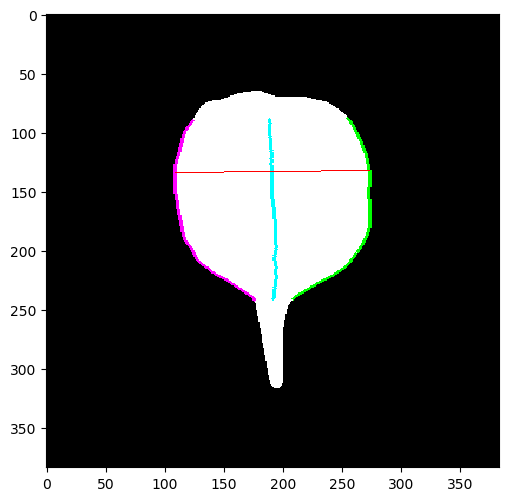

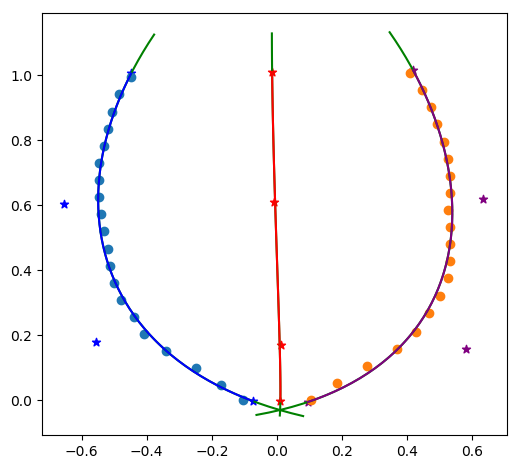

In [8]:
%matplotlib inline
UNIT = 256
path='シルエット/17Apically/17daruma6o06_l.jpg'
path='シルエット/17Horn/17aomida1o02_l.jpg'
path ='シルエット/17Spheric/17yakumi2o06_l.jpg'
# 画像の読み込み
src = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# 画像サイズを標準化する。
img = getstandardShape(src, unitSize=UNIT,showResult=False)
ll,rl,cl,dmax  = threeLinesSeq(img, showImage =  True);
Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,tc0,a00,a10,a20,x00,y00 = initialize(ldata,cdata,rdata,ll,cl,rl)
result = fitcurve0(Lsamples,Rsamples,cpl0,cpr0,cpc0,tl0,tr0,tc0,a00,a10,a20,x00,y00,showImage=True)
CPL,CPR,CPC,a0,a1,a2,x0,y0,px0,px1,px2,px3,py1,py2,py3 = result
# seisho(Lsamples,Rsamples,a0,a1,a2,x0,y0,px0,px1,px2,px3,py1,py2,py3)

In [9]:
type(Rsamples)

numpy.ndarray

In [10]:
Rsamples[0]

array([0.105114762362388, 0], dtype=object)